In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
demographic_dataset = pd.read_csv("Demographic_Segment_Data.csv")

In [3]:
demographic_dataset.head(10)

,Age,Gender,Occupation,Monthly_Income
0,56,Female,Working Professional,54915
1,46,Female,Retired,56963
2,32,Male,Student,63718
3,60,Male,Self-Employed,30611
4,25,Male,Working Professional,30760
5,38,Female,Working Professional,51544
6,56,Female,Self-Employed,46567
7,36,Male,Student,40301
8,40,Other,Student,67084
9,28,Female,Student,42106


In [4]:
demographic_dataset.describe()

,Age,Monthly_Income
count,100000.000000,100000.000000
mean,41.022480,50040.552880
std,13.526548,14964.114137
min,18.000000,8000.000000
25%,29.000000,39940.750000
50%,41.000000,50052.500000
75%,53.000000,60114.250000
max,64.000000,115427.000000


In [5]:
demographic_dataset.isnull().sum()

Age               0
Gender            0
Occupation        0
Monthly_Income    0
dtype: int64

In [6]:
demographic_dataset["Gender"].describe()

count     100000
unique         3
top         Male
freq       48021
Name: Gender, dtype: object

In [7]:
demographic_dataset.shape

(100000, 4)

In [8]:
demographic_dataset["Age"].describe()

count    100000.000000
mean         41.022480
std          13.526548
min          18.000000
25%          29.000000
50%          41.000000
75%          53.000000
max          64.000000
Name: Age, dtype: float64

In [9]:
demographic_dataset["Occupation"].describe()

count      100000
unique          4
top       Retired
freq        25151
Name: Occupation, dtype: object

In [10]:
demographic_dataset["Monthly_Income"].describe()

count    100000.000000
mean      50040.552880
std       14964.114137
min        8000.000000
25%       39940.750000
50%       50052.500000
75%       60114.250000
max      115427.000000
Name: Monthly_Income, dtype: float64

#Demographic EDA

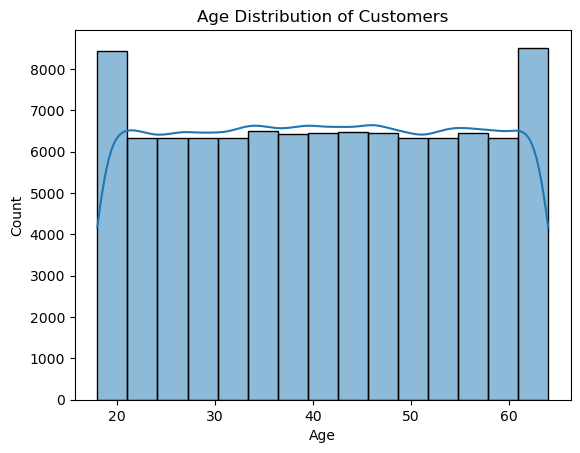

In [11]:
# Age Distribution
sns.histplot(demographic_dataset['Age'], bins=15, kde=True)
plt.title('Age Distribution of Customers')
plt.show()


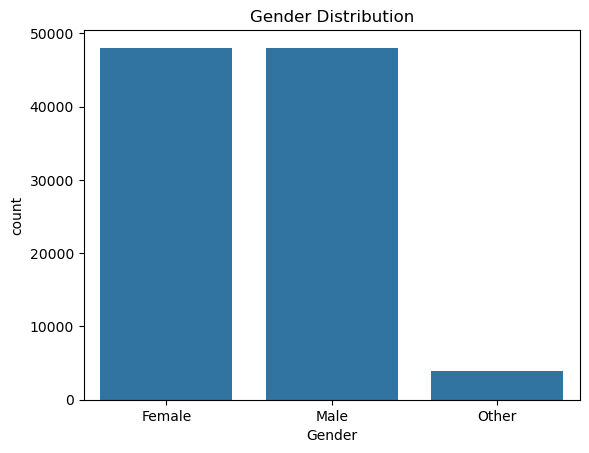

In [12]:
# Gender Distribution
sns.countplot(x='Gender', data=demographic_dataset)
plt.title('Gender Distribution')
plt.show()

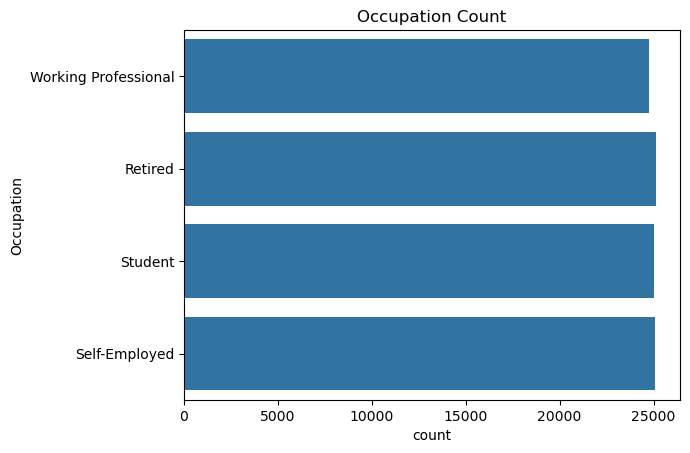

In [13]:
# Occupation Distribution
sns.countplot(y='Occupation', data=demographic_dataset)
plt.title('Occupation Count')
plt.show()


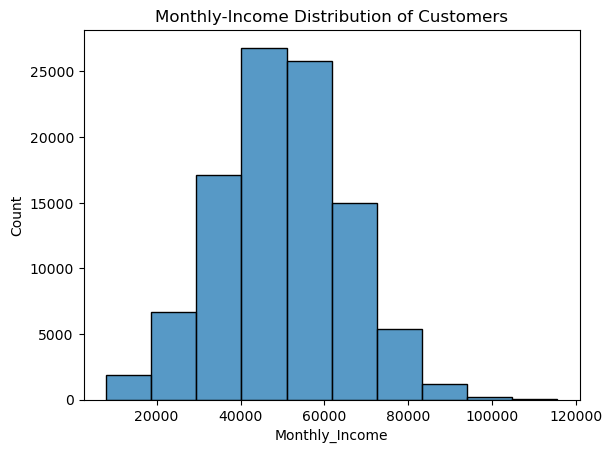

In [14]:
# Monthly-Income Distribution
sns.histplot(demographic_dataset['Monthly_Income'], bins=10)
plt.title('Monthly-Income Distribution of Customers')
plt.show()
 

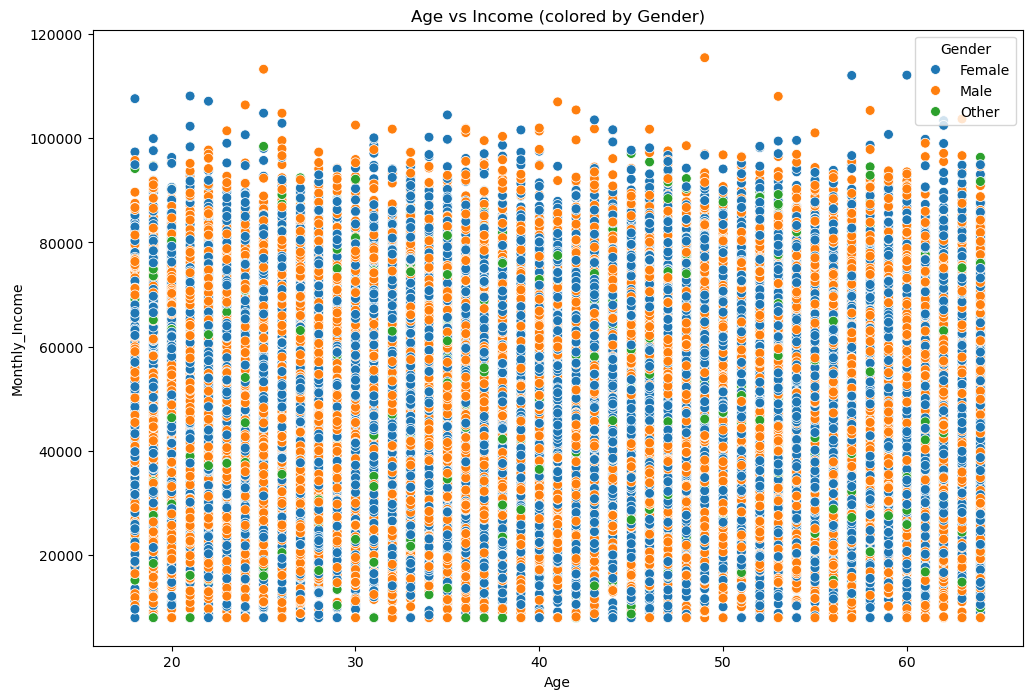

In [15]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Monthly_Income', hue='Gender', data=demographic_dataset,s=50 )
plt.title('Age vs Income (colored by Gender)')
plt.show()



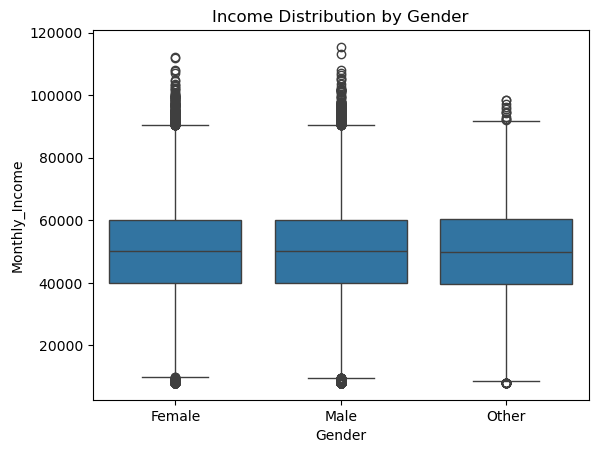

In [16]:
# Gender vs Income Boxplot
sns.boxplot(x='Gender', y='Monthly_Income', data=demographic_dataset)
plt.title('Income Distribution by Gender')
plt.show()

#Segment Extraction (Clustering Analysis)

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [18]:
#creating a copy 
demographic_cluster = demographic_dataset.copy()

In [19]:
demographic_cluster["Gender"] = LabelEncoder().fit_transform(demographic_cluster["Gender"])
demographic_cluster["Occupation"] = LabelEncoder().fit_transform(demographic_cluster["Occupation"])


In [20]:
features = demographic_cluster[["Gender","Occupation","Age","Monthly_Income"]]

In [21]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features) 

In [22]:
wcss = []

for i in range(1,11):
    k_means = KMeans(n_clusters = i, random_state = 42)
    k_means.fit(scaled_features)
    wcss.append(k_means.inertia_)

Text(0.5, 1.0, 'Elbow method for optimal K')

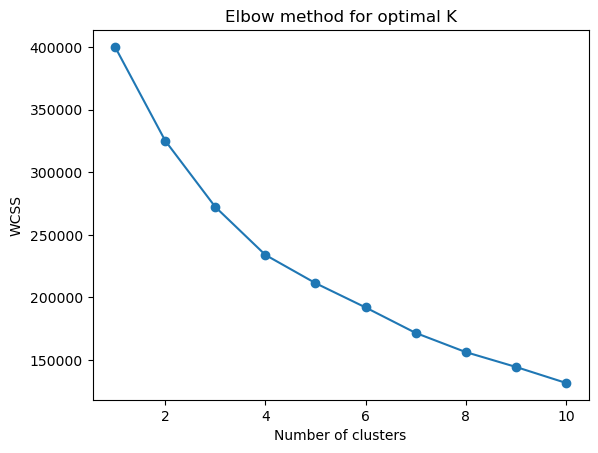

In [23]:
plt.plot(range(1,11), wcss, marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow method for optimal K")

In the graph, at number of clusters = 4 we notice the elbow point where the slope is starts flattening 

In [24]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
clusters = kmeans.fit_predict(features)

In [25]:
demographic_cluster['Cluster'] = clusters
demographic_cluster.head(10)

,Age,Gender,Occupation,Monthly_Income,Cluster
0,56,0,3,54915,1
1,46,0,0,56963,1
2,32,1,2,63718,1
3,60,1,1,30611,0
4,25,1,3,30760,0
5,38,0,3,51544,1
6,56,0,1,46567,3
7,36,1,2,40301,3
8,40,2,2,67084,2
9,28,0,2,42106,3


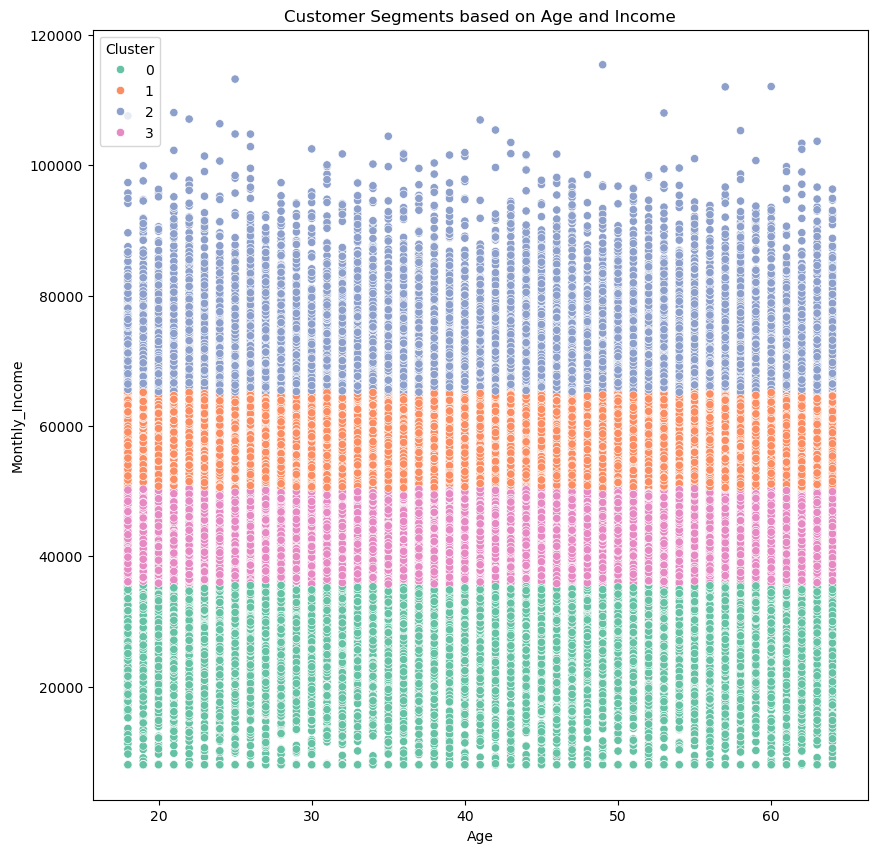

In [26]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='Age' , y ='Monthly_Income' ,data = demographic_cluster, hue = 'Cluster', palette = 'Set2')
plt.title('Customer Segments based on Age and Income')
plt.show()

In [27]:
demographic_cluster.groupby('Cluster')[['Age', 'Monthly_Income']].mean()


,Age,Monthly_Income
Cluster,,
0,41.047218,27686.075928
1,40.972933,57188.351967
2,41.179940,73039.315793
3,40.986886,43592.845145
